In [2]:
import pandas as pa
import numpy as np
import itertools
import csv


En tete a lire a chaque fois : les ID ne sont pas uniques, ça vient peut_etre des etoilllllllles je vais voir ce que je peux faire au pire j'en recrée.

edit : 
non, ça vient du fait que les TE sont morcelés, et du coup pour le meme te on garde la meme ID meme si les séquences sont discontinues. du coup je fais quoi je sais pas.

edit lundi 27 : 
j'ai recrée de nouvelle ID, ça devrait suffire pour faire fonctionner tout ça. 
(ça fonctionne effectivement, mais en l'état l'annotation n'est pas de bonne qualité. 

In [4]:
names_col_data = ['SW_score',"perc_div","perc_del","perc_ins", "query_seq", "pos_query_begin", "pos_query_end", "pos_query_left","strand", "matching_repeat", "repeat_class_family", "pos_in_repeat_begin", "pos_in_repeat_end", "pos_in_repeat_left", "TE_A_ID","star"]
data = pa.read_csv("/home/tkastylevsky/FASTA_files/gallus_gallus_proper/gallus_proper_chr16/chr16.fa.out",header = None, skiprows = 2, sep = '\s+', names = names_col_data)
data['strand'] = data['strand'].replace('C','-')
data.insert(1,"A_ID",list(range(1,len(data)+1)))

data_split = data.repeat_class_family.str.split('/',expand = True)
data = data.join(data_split)
data.columns = ['SW_score','A_ID',"perc_div","perc_del","perc_ins", "query_seq", "pos_query_begin", "pos_query_end", "pos_query_left","strand", "matching_repeat", "repeat_class_family", "pos_in_repeat_begin", "pos_in_repeat_end", "pos_in_repeat_left", "TE_A_ID","star","repeat_class","repeat_family"]
data = data.drop('repeat_class_family', axis = 1)
data

,SW_score,A_ID,perc_div,perc_del,perc_ins,query_seq,pos_query_begin,pos_query_end,pos_query_left,strand,matching_repeat,pos_in_repeat_begin,pos_in_repeat_end,pos_in_repeat_left,TE_A_ID,star,repeat_class,repeat_family
0,24,1,30.7,0.0,0.0,chr16,503450,503521,(2341080),+,(CC)n,1,72,(0),1,NaN,Simple_repeat,None
1,12,2,15.6,3.5,0.0,chr16,524575,524603,(2319998),+,(CCGG)n,1,30,(0),2,NaN,Simple_repeat,None
2,15,3,0.0,0.0,0.0,chr16,528437,528455,(2316146),+,(CGG)n,1,19,(0),3,NaN,Simple_repeat,None
3,13,4,20.1,2.2,4.5,chr16,529013,529057,(2315544),+,(CCTTCTC)n,1,44,(0),4,NaN,Simple_repeat,None
4,15,5,7.9,3.7,0.0,chr16,529232,529258,(2315343),+,(GGC)n,1,28,(0),5,NaN,Simple_repeat,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,16,2268,13.2,0.0,0.0,chr16,2841518,2841542,(3059),+,(G)n,1,25,(0),2096,NaN,Simple_repeat,None
2268,235,2269,15.6,11.7,6.5,chr16,2844203,2844305,(296),-,rnd-1_family-82,(0),108,1,2097,*,Unknown,None
2269,249,2270,14.7,10.6,6.1,chr16,2844216,2844309,(292),+,rnd-1_family-84,6,103,(8),2098,NaN,Unknown,None
2270,265,2271,11.4,11.5,7.4,chr16,2844440,2844543,(58),-,rnd-1_family-82,(0),108,1,2099,*,Unknown,None


In [5]:
data_intersect = data
data_intersect = data_intersect.drop(["SW_score","perc_del","perc_ins", "pos_query_left", "pos_in_repeat_begin", "pos_in_repeat_end", "pos_in_repeat_left", "star"], axis = 1 )
data_intersect.insert(1, "feature", "Similarity")
data_intersect.insert(1, "source", "RepeatMasker")
data_intersect.insert(1, "phase", ".")

data_intersect = data_intersect[['query_seq','source','feature','pos_query_begin','pos_query_end', 'perc_div', 'strand','phase', 'A_ID']]
data_intersect.to_csv('/home/tkastylevsky/FASTA_files/gallus_gallus_proper/gallus_proper_chr16/chr16.fa.out_1.gff', sep = '\t', header = False, index = False)

In [8]:
data_intersect

,query_seq,source,feature,pos_query_begin,pos_query_end,perc_div,strand,phase,A_ID
0,chr16,RepeatMasker,Similarity,503450,503521,30.7,+,.,1
1,chr16,RepeatMasker,Similarity,524575,524603,15.6,+,.,2
2,chr16,RepeatMasker,Similarity,528437,528455,0.0,+,.,3
3,chr16,RepeatMasker,Similarity,529013,529057,20.1,+,.,4
4,chr16,RepeatMasker,Similarity,529232,529258,7.9,+,.,5
...,...,...,...,...,...,...,...,...,...
2267,chr16,RepeatMasker,Similarity,2841518,2841542,13.2,+,.,2268
2268,chr16,RepeatMasker,Similarity,2844203,2844305,15.6,-,.,2269
2269,chr16,RepeatMasker,Similarity,2844216,2844309,14.7,+,.,2270
2270,chr16,RepeatMasker,Similarity,2844440,2844543,11.4,-,.,2271


In [8]:
#nombre de hit qui se superposent à un meilleur hit au sein d'un meme out. 
print(data.star.count())

13445


In [7]:
names_col_ref = ['SW_score',"perc_div","perc_del","perc_ins", "query_seq", "pos_query_begin", "pos_query_end", "pos_query_left","strand", "matching_repeat", "repeat_class_family", "pos_in_repeat_begin", "pos_in_repeat_end", "pos_in_repeat_left", "TE_B_ID","star"]

ref = pa.read_csv("/home/tkastylevsky/FASTA_files/gallus_gallus_proper/galGal6.fa.out",header = None, skiprows = 2, sep = '\s+', names = names_col_ref)
ref['strand'] = ref['strand'].replace('C','-')
ref_chr16 = ref[ref['query_seq']=='chr16']
ref = ref_chr16
ref.insert(1,"B_ID",list(range(1,len(ref)+1)))
ref_split = ref.repeat_class_family.str.split('/',expand = True)
ref = ref.join(ref_split)
ref.columns = ['SW_score','B_ID',"perc_div","perc_del","perc_ins", "query_seq", "pos_query_begin", "pos_query_end", "pos_query_left","strand", "matching_repeat", "repeat_class_family", "pos_in_repeat_begin", "pos_in_repeat_end", "pos_in_repeat_left", "TE_B_ID","star","repeat_class","repeat_family"]
ref

,SW_score,B_ID,perc_div,perc_del,perc_ins,query_seq,pos_query_begin,pos_query_end,pos_query_left,strand,matching_repeat,repeat_class_family,pos_in_repeat_begin,pos_in_repeat_end,pos_in_repeat_left,TE_B_ID,star,repeat_class,repeat_family
201944,24,1,30.7,0.0,0.0,chr16,503450,503521,(2341080),+,(CC)n,Simple_repeat,1,72,(0),192007,NaN,Simple_repeat,None
201945,13,2,14.1,0.0,13.0,chr16,506690,506741,(2337860),+,(GTCACC)n,Simple_repeat,1,46,(0),192008,NaN,Simple_repeat,None
201946,339,3,27.8,4.5,6.6,chr16,506784,506964,(2337637),+,(CACCAT)n,Simple_repeat,4,180,(0),192009,NaN,Simple_repeat,None
201947,259,4,13.3,11.2,9.2,chr16,507278,507451,(2337150),+,(CACGT)n,Simple_repeat,3,180,(0),192010,NaN,Simple_repeat,None
201948,567,5,29.2,3.3,0.5,chr16,507595,508747,(2335854),+,GGXHOI,Satellite/W-chromosome,1,1185,(1),192011,NaN,Satellite,W-chromosome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204269,16,2326,16.1,0.0,0.0,chr16,2832506,2832533,(12068),+,G-rich,Low_complexity,1,28,(0),193944,NaN,Low_complexity,None
204270,13,2327,18.4,7.0,0.0,chr16,2834739,2834781,(9820),+,(GCCGAA)n,Simple_repeat,1,46,(0),193945,NaN,Simple_repeat,None
204271,14,2328,15.3,4.3,4.3,chr16,2840337,2840383,(4218),+,G-rich,Low_complexity,1,47,(0),193946,NaN,Low_complexity,None
204272,273,2329,14.9,10.1,7.0,chr16,2840964,2841078,(3523),-,(CCCCATTGGG)n,Satellite,(0),120,2,193947,NaN,Satellite,None


In [9]:
ref_intersect = ref
ref_intersect = ref_intersect.drop(["SW_score","perc_del","perc_ins", "pos_query_left","repeat_class_family", "pos_in_repeat_begin", "pos_in_repeat_end", "pos_in_repeat_left", "star"], axis = 1 )
ref_intersect.insert(1, "feature", "Similarity")
ref_intersect.insert(1, "source", "RepeatMasker")
ref_intersect.insert(1, "phase", ".")

ref_intersect =ref_intersect[['query_seq','source','feature','pos_query_begin','pos_query_end', 'perc_div', 'strand','phase', 'B_ID']]
ref_intersect.to_csv('/home/tkastylevsky/FASTA_files/gallus_gallus_proper/galGal6.chr16.fa.gff', sep = '\t', header = False, index  = False)


Pour passer a la suite, il faut faire un détour par bedtools pour récupérer les intersections(ça m'a semblé plus pratique)

In [10]:
#results A match_raw combien de fois A match dans B, sans tenir compte du type ni de la longueur des matchs. 

results = pa.read_csv("/home/tkastylevsky/results/results_bedtools/chk_galGal6_chr16_sequence.out_compared_to_ref.txt",header = None, sep = '\s+')
results = results.drop([0,1,2,5,6,7,9,10,11,14,15,16], axis = 1)
names_col_2 = ['A_start','A_end','A_ID','B_start','B_end','B_ID','intersect']
results.columns = names_col_2

results['intersect_A'] = results['intersect']/(results['A_end']-results['A_start'])
results['intersect_B'] = results['intersect']/(results['B_end']-results['B_start'])





Deux petits graphes qui résument les pourcentages d'identité entre les matchs. J'ai ai fais un en logscale 

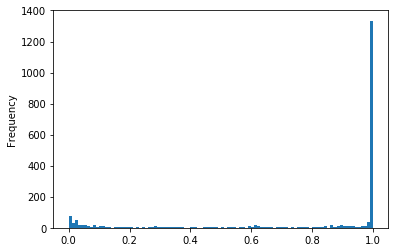

In [12]:
plot = results.intersect_A.plot.hist(bins = 100)


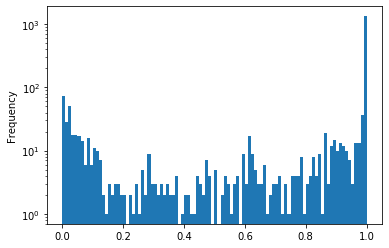

In [13]:
plot = results.intersect_A.plot.hist(bins = 100)
plot.set_yscale('log')

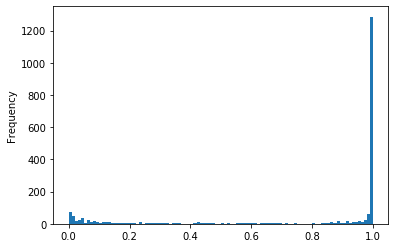

In [14]:
plot = results.intersect_B.plot.hist(bins = 100)

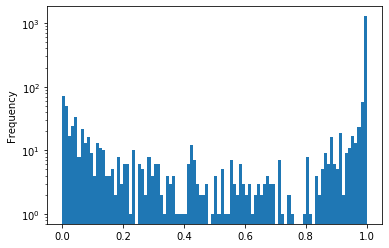

In [15]:
plot = results.intersect_B.plot.hist(bins = 100)
plot.set_yscale('log')

On va regarder le pourcentage de hits pour nos données et la ref dans le bedtools intersect. 

In [16]:
ID_A = pa.DataFrame(list(range(1,len(data)+1)))
ID_B = pa.DataFrame(list(range(1,len(ref)+1)))
#ID_A.A_ID.isin(ID_A)]
ID_A.columns = ['ID']
ID_B.columns = ['ID']

A_presence = ID_A[ID_A.ID.isin(results.A_ID)]
B_presence = ID_B[ID_B.ID.isin(results.B_ID)]
A_absence = ID_A[~ID_A.ID.isin(results.A_ID)]
B_absence = ID_B[~ID_B.ID.isin(results.B_ID)]


on va juste regarder rapidement comment ça change lorsque l'on demande a bedtools d'etre plus stringeant sur ses intersections. (on accepte que les hits a 80% reciproques)

In [17]:
results_best = pa.read_csv("/home/tkastylevsky/results/results_bedtools/chk_galGal6_chr16_sequence.out_compared_to_ref_80.txt",header = None, sep = '\s+')
results_best = results_best.drop([0,1,2,5,6,7,9,10,11,14,15,16], axis = 1)
results_best.columns = names_col_2
results_best
A_presence_best = ID_A[ID_A.ID.isin(results_best.A_ID)]
B_presence_best = ID_B[ID_B.ID.isin(results_best.B_ID)]
A_absence_best = ID_A[~ID_A.ID.isin(results_best.A_ID)]
B_absence_best = ID_B[~ID_B.ID.isin(results_best.B_ID)]
print(len(A_presence), 'VS', len(A_presence_best))
print(len(B_presence), 'VS', len(B_presence_best))
print(len(A_absence), 'VS', len(A_absence_best))
print(len(B_absence), 'VS', len(B_absence_best))

1694 VS 1323
1696 VS 1320
578 VS 949
634 VS 1010


In [18]:
#des petits pourcentages sur les totaux: 
perc_hit_A = len(A_presence)/(len(A_presence)+len(A_absence))
perc_hit_B = len(B_presence)/(len(B_presence)+len(B_absence))

perc_hit_A_best = len(A_presence_best)/(len(A_presence_best)+len(A_absence_best))
perc_hit_B_best = len(B_presence_best)/(len(B_presence_best)+len(B_absence_best))

print(perc_hit_A, 'VS', perc_hit_A_best )
print(perc_hit_B, 'VS', perc_hit_B_best )

0.7455985915492958 VS 0.582306338028169
0.7278969957081545 VS 0.5665236051502146


on s'attaque au type matching ! yay ! 

edit : 

lundi 27 janvier,  il y a un soucis dans le results_type, qui vient sans doute du merge et de la façon dont il est fait (il est beaucoup trop petit)


edit : c'est corrigé. il fallait faire un "inner" et pas un "outer"

In [19]:
results_type = results.drop(['intersect'], axis = 1)
results_type = pa.merge(results_type, data, on = 'A_ID', how = 'inner')
results_type = results_type[['A_ID','B_ID','intersect_A','intersect_B', 'matching_repeat','repeat_class','repeat_family','TE_A_ID']]
results_type.columns = ['A_ID','B_ID','intersect_A','intersect_B', 'matching_repeat_A', 'repeat_class_A','repeat_family_A','TE_A_ID']
ref_type = ref[['B_ID','matching_repeat', 'repeat_class','repeat_family','TE_B_ID']]
ref_type.columns = ['B_ID','matching_repeat_B','repeat_class_B','repeat_family_B','TE_B_ID']


results_type = pa.merge(results_type, ref_type, on = 'B_ID', how = 'inner')

results_type.to_csv('/home/tkastylevsky/results/bedtools_analysis/chk_galgal6_chr16_repeat_fam_intersect.csv',sep = '\t', index = False)



Pour la suite, voir le code R bedtools display, pour se faire une idée générale de la qualité de l'annotation (pas bonne)

In [23]:
results_type[(results_type['repeat_family_A'] != results_type['repeat_family_B'])]



,A_ID,B_ID,intersect_A,intersect_B,matching_repeat_A,repeat_class_A,repeat_family_A,TE_A_ID,matching_repeat_B,repeat_class_B,repeat_family_B,TE_B_ID
0,1,8,1.000000,1.000000,(G)n,Simple_repeat,None,1,(G)n,Simple_repeat,None,8
1,2,9,1.000000,1.000000,(ACAAC)n,Simple_repeat,None,2,(ACAAC)n,Simple_repeat,None,9
2,5,10,0.988263,1.000000,ltr-1_family-5,LTR,Unknown,5,GGLTR3F2,LTR,ERVL,10
3,5,11,0.004695,0.003552,ltr-1_family-5,LTR,Unknown,5,CR1-D,LINE,CR1,11
9,12,15,1.000000,1.000000,(C)n,Simple_repeat,None,11,(C)n,Simple_repeat,None,15
...,...,...,...,...,...,...,...,...,...,...,...,...
149904,163416,142818,1.000000,1.000000,(CA)n,Simple_repeat,None,158657,CR1-8_Crp,LINE,CR1,135789
149905,163417,142819,1.000000,0.989583,rnd-6_family-3648,Unknown,None,158658,CR1-F2,LINE,CR1,135790
149911,163426,142823,0.886010,1.000000,rnd-1_family-8,LINE,CR1,158667,(GGAGA)n,Simple_repeat,None,135794
149912,163427,142824,1.000000,1.000000,(TCCCACA)n,Simple_repeat,None,158668,Char12Mar1_GG,DNA,hAT-Charlie,135795


In [408]:
results_type = results.drop(['intersect'], axis = 1)

Par la suite, au vu des deux graphes précédents, on va se concentrer sur les 5% qui s'intersectent le plus. Pour ça, on repasse par Bedtools. 
edit : on verra ça après. pour le moment je garde la liste complete. 

In [267]:
results_best = pa.read_csv("/home/tkastylevsky/results/results_bedtools/chk_galGal6_chr1_sequence.out_compared_to_ref_best.txt",header = None, sep = '\s+')
results_best = results_best.drop([0,1,2,5,6,7,9,10,11,14,15,16], axis = 1)
results_best.columns = names_col_2
print("number of unique hits for A when A is intersected in B",results_best.A_ID.nunique())
print("number of unique hits for A when A is intersected in B",results_best.B_ID.nunique())

number of unique hits for A when A is intersected in B 106593
number of unique hits for A when A is intersected in B 105507
